$$
f(\alpha)=(1+\alpha^{2}x_{0}^{2})^{\frac{N+1}{2}} \frac{1}{\alpha^{N}}
$$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from math import *

In [38]:
def f(x, x0=0.1, N=4):
    exp_num = (N + 1) / 2
    return (1 + x ** 2 * x0 ** 2) ** exp_num / x ** N


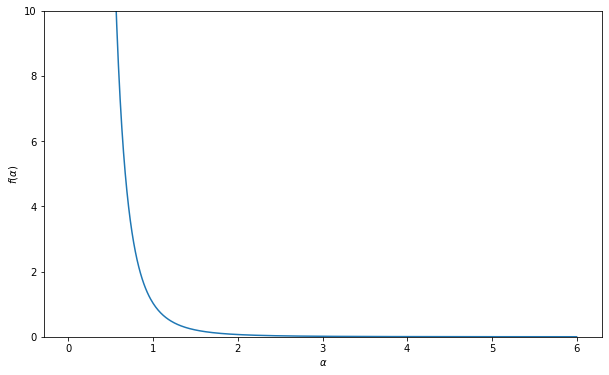

In [39]:
# plot the function
x = np.linspace(0.01, 6, 600)
y = f(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylim([0, 10])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()

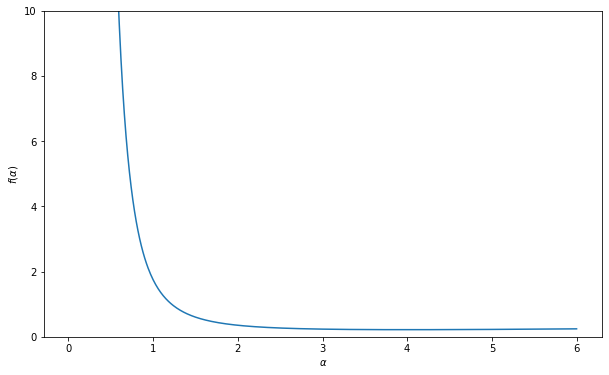

In [19]:
y = f(x, x0=0.5)
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylim([0, 10])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()

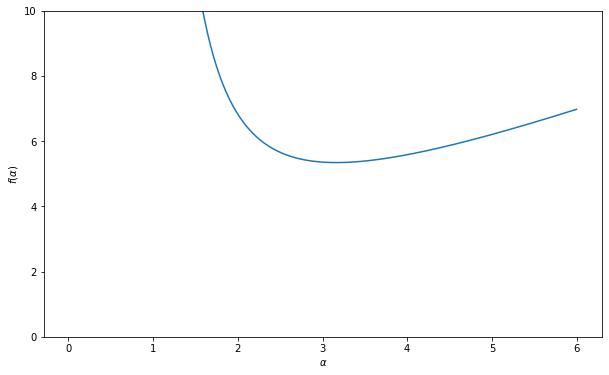

In [30]:
y = f(x, x0=1.0, N=10)
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.ylim([0, 10])
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
plt.show()